# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

데이터 살펴보기

In [ ]:
!pip install xlrd==1.2.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/04_21/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

## 데이터 타입과 결측값 확인하기

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

In [7]:
df = df[['ZN', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV']]

df

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0


In [8]:
df['CHAS'].unique()

array([0, 1])

In [9]:
def func(x):
    if x == 0:
        return "City Vue"
    else:
        return "Liver Vue"

df['VUE'] = df['CHAS'].map(func)
df.head()

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue


In [10]:
how = {
    "MEDV" : np.mean
}
dv = df.groupby('VUE').agg(how)

dv

,MEDV
VUE,
City Vue,22.093843
Liver Vue,28.440000


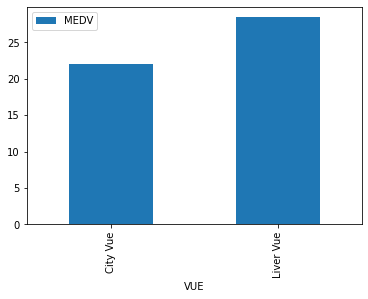

In [11]:
dv.plot.bar()

## 데이터 분포 확인하기

In [12]:
df["RM"].nunique()

446

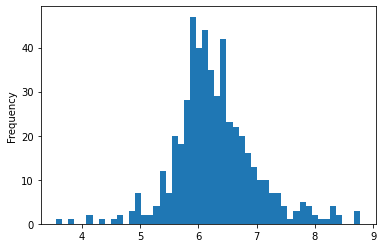

In [13]:
df["RM"].plot.hist(bins=50)

In [14]:
def func(x):
    if x < 8:
        return "few(~7)"
    else:
        return "many(8~)"

df['RN'] = df['RM'].map(func)
df.head()

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7)
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7)
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7)
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7)
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7)


In [16]:
dr

,MEDV
RN,
few(~7),21.96146
many(8~),44.20000


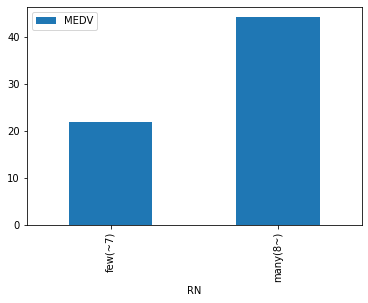

In [17]:
how = {
    "MEDV" : np.mean
}
dr = df.groupby('RN').agg(how)

dr.plot.bar()

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

In [18]:
df["ZN"].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

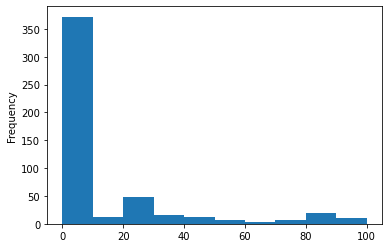

In [19]:
df["ZN"].plot.hist()

In [ ]:
df

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7)
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7)
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7)
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7)
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0,City Vue,few(~7)
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0,City Vue,few(~7)
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0,City Vue,few(~7)
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0,City Vue,few(~7)


In [20]:
def func(x):
    if x == 0:
        return "small"
    else:
        return "large"

df_a = df['ACA'] = df['ZN'].map(func)
df_a.head

<bound method NDFrame.head of 0      large
1      small
2      small
3      small
4      small
       ...  
501    small
502    small
503    small
504    small
505    small
Name: ZN, Length: 506, dtype: object>

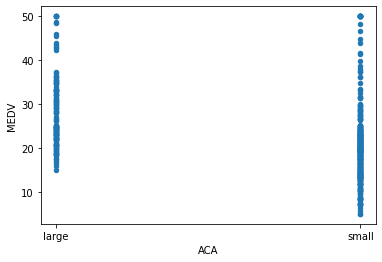

In [21]:
# 대형 평수 vs 소형 평수

df.plot.scatter(x='ACA', y='MEDV')

In [22]:
how = {
    "MEDV" : np.mean
}
t_ca_m = df.groupby('ACA').agg(how)

t_ca_m

,MEDV
ACA,
large,28.250000
small,20.473387


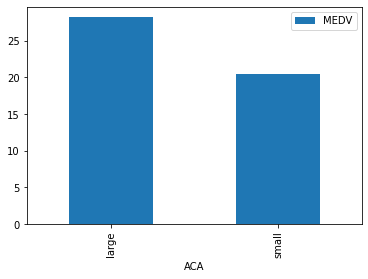

In [23]:
# 대형 평수 vs 소형 평수

t_ca_m.plot.bar()

In [ ]:
df

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7)
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7)
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7)
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7)
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0,City Vue,few(~7)
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0,City Vue,few(~7)
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0,City Vue,few(~7)
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0,City Vue,few(~7)


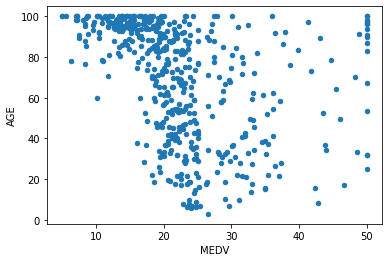

In [24]:
# 노후화 정도와 집값의 관계는?

df.plot.scatter('MEDV', 'AGE')

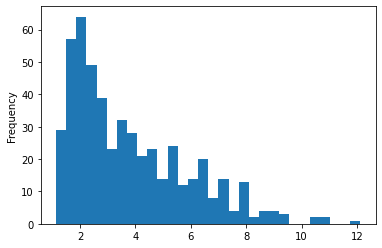

In [25]:
df['DIS'].plot.hist(bins=30)

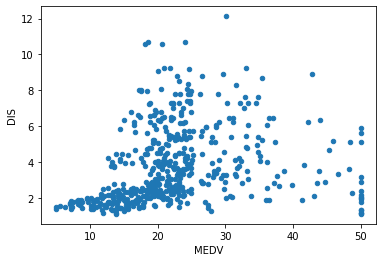

In [26]:
# 직주근접?

df.plot.scatter('MEDV', 'DIS')

In [27]:
def func(x):
    if x == 0:
        return "City Vue"
    else:
        return "Liver Vue"

df['VUE'] = df['CHAS'].map(func)
df.head()

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN,ACA
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7),large
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7),small
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7),small
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7),small
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7),small


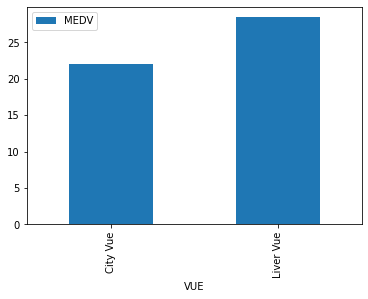

In [28]:
# 찰스강뷰? // 위에 중복

dv.plot.bar()

In [29]:
D_A = df.copy()
D_A

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN,ACA
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7),large
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7),small
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7),small
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7),small
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7),small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0,City Vue,few(~7),small
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0,City Vue,few(~7),small
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0,City Vue,few(~7),small
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0,City Vue,few(~7),small


In [30]:
D_A['DIS'].mean()

3.795042687747034

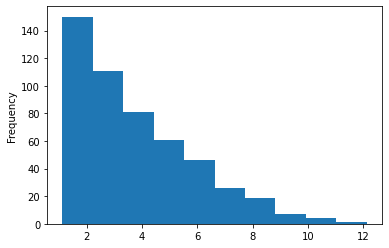

In [31]:
D_A['DIS'].plot.hist()

In [35]:
def func(x):
    if x <= 4:
        return "close"
    else:
        return "far"

D_A['COM'] = D_A['DIS'].map(func)
D_A.head()

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN,ACA,COM
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7),large,far
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7),small,far
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7),small,far
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7),small,far
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7),small,far


In [36]:
how = {
    "MEDV" : np.mean
}
da = df.groupby('COM').agg(how)

da

,MEDV
COM,
close,21.032911
far,25.027368


In [37]:
cond =  D_A['ACA'] == 'small'
AS = df.loc[cond]

def func(x):
    if x <= 4:
        return "close"
    else:
        return "far"

AS['COM'] = AS['DIS'].map(func)

# cond2 = df['DIS'] >= 4
# AS = df.loc[cond2]
cond2 = AS['COM'] == 'close'
ds = AS.loc[cond2]
ds
# cond = df['sex'] == "m"
# m = df.loc[cond]

# w = df.loc[ df['sex'] == 'w' ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN,ACA,COM
18,0.0,0,0.538,5.456,36.6,3.7965,4,307,288.99,11.69,20.2,0,City Vue,few(~7),small,close
19,0.0,0,0.538,5.727,69.5,3.7965,4,307,390.95,11.28,18.2,0,City Vue,few(~7),small,close
20,0.0,0,0.538,5.570,98.1,3.7979,4,307,376.57,21.02,13.6,0,City Vue,few(~7),small,close
22,0.0,0,0.538,6.142,91.7,3.9769,4,307,396.90,18.72,15.2,0,City Vue,few(~7),small,close
32,0.0,0,0.538,5.950,82.0,3.9900,4,307,232.60,27.71,13.2,0,City Vue,few(~7),small,close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0,City Vue,few(~7),small,close
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0,City Vue,few(~7),small,close
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0,City Vue,few(~7),small,close
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0,City Vue,few(~7),small,close


In [38]:
ds.loc[:, 'MEDV'].to_frame()

,MEDV
18,20.2
19,18.2
20,13.6
22,15.2
32,13.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


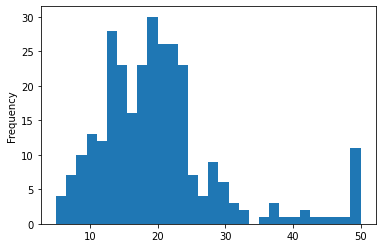

In [39]:
# 직장이 가까우면서 소형 평수인 부동산의 가격은?

ds.loc[:, 'MEDV'].plot.hist(bins=30)

In [40]:
df

,ZN,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,LSTAT,MEDV,CAT. MEDV,VUE,RN,ACA,COM
0,18.0,0,0.538,6.575,65.2,4.0900,1,296,396.90,4.98,24.0,0,City Vue,few(~7),large,far
1,0.0,0,0.469,6.421,78.9,4.9671,2,242,396.90,9.14,21.6,0,City Vue,few(~7),small,far
2,0.0,0,0.469,7.185,61.1,4.9671,2,242,392.83,4.03,34.7,1,City Vue,few(~7),small,far
3,0.0,0,0.458,6.998,45.8,6.0622,3,222,394.63,2.94,33.4,1,City Vue,few(~7),small,far
4,0.0,0,0.458,7.147,54.2,6.0622,3,222,396.90,5.33,36.2,1,City Vue,few(~7),small,far
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0,0.573,6.593,69.1,2.4786,1,273,391.99,9.67,22.4,0,City Vue,few(~7),small,close
502,0.0,0,0.573,6.120,76.7,2.2875,1,273,396.90,9.08,20.6,0,City Vue,few(~7),small,close
503,0.0,0,0.573,6.976,91.0,2.1675,1,273,396.90,5.64,23.9,0,City Vue,few(~7),small,close
504,0.0,0,0.573,6.794,89.3,2.3889,1,273,393.45,6.48,22.0,0,City Vue,few(~7),small,close


<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>

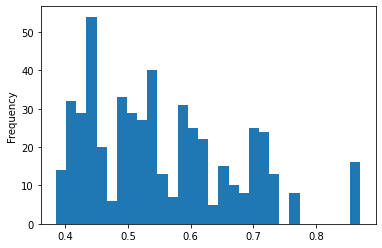

In [49]:
df['NOX'].plot.hist(bins=30)

In [52]:
cond = df['VUE'] == 'City Vue'
df.loc[  cond ,   'NOX' ]

0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
       ...  
501    0.573
502    0.573
503    0.573
504    0.573
505    0.573
Name: NOX, Length: 471, dtype: float64

In [53]:
cond = df['VUE'] == 'Liver Vue'
df.loc[  cond ,   'NOX' ]

142    0.8710
152    0.8710
154    0.8710
155    0.8710
160    0.6050
162    0.6050
163    0.6050
208    0.4890
209    0.4890
210    0.4890
211    0.4890
212    0.4890
216    0.5500
218    0.5500
219    0.5500
220    0.5070
221    0.5070
222    0.5070
234    0.5070
236    0.5070
269    0.4640
273    0.4640
274    0.4470
276    0.4470
277    0.4470
282    0.4429
283    0.4010
356    0.7700
357    0.7700
358    0.7700
363    0.7700
364    0.7180
369    0.6310
370    0.6310
372    0.6680
Name: NOX, dtype: float64

In [51]:
df['NOX'].loc['MEDV']

KeyError: ignored

In [45]:
how = {
    "NOX" : np.mean
}
nox = df.groupby('VUE').agg(how)

nox

,NOX
VUE,
City Vue,0.551817
Liver Vue,0.593426


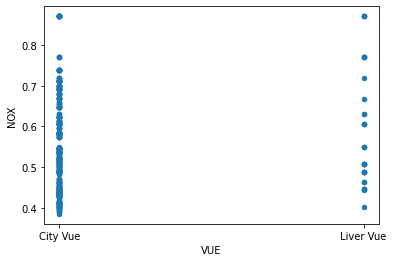

In [44]:
df.plot.scatter('VUE', 'NOX')

In [ ]:
cond =  df['ACA'] == 'small'
a = df.loc[cond]

# cond2 = df['DIS'] >= 4
# AS = df.loc[cond2]
cond2 = AS['COM'] == 'close'
ds = AS.loc[cond2]
df.plot.scatter('VUE', 'NOX')

In [42]:
how = {
    "TAX" : np.mean
}
tax = df.groupby('VUE').agg(how)

tax

,TAX
VUE,
City Vue,409.870488
Liver Vue,386.257143


안녕하세요..ㅎ
좋은 강의 해주셨는데.. 결과가 너무 형편없이 나와서 죄송합니다..
많이 복습해서 알려주신 내용 꼭 활용할 수 있도록 하겠습니다!
건강하세요~! :)